In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vinzy_imgdata_importer import img_data_importer

In [2]:
X, y, m = img_data_importer("D:/Data Science & AI/DL-CNN-RNN/DATA_DL_CV/brain_deseases")

Do you want to convert your image data to grey scale? y/n:  n
Do you want to resize your data? y/n [default:100x100]:  y
enter the size:  60


Generating, Shuffling & Mapping the Data...


Do you want to normalize your data? y/n [recommended]:  y
Do you want to save your data? y/n [will be saved using pickle]:  n


In [3]:
m

{'Astrocitoma T1': 0,
 'Astrocitoma T1C+': 1,
 'Astrocitoma T2': 2,
 'Carcinoma T1': 3,
 'Carcinoma T1C+': 4,
 'Carcinoma T2': 5,
 'Ependimoma T1': 6,
 'Ependimoma T1C+': 7,
 'Ependimoma T2': 8,
 'Ganglioglioma T1': 9,
 'Ganglioglioma T1C+': 10,
 'Ganglioglioma T2': 11,
 'Germinoma T1': 12,
 'Germinoma T1C+': 13,
 'Germinoma T2': 14,
 'Glioblastoma T1': 15,
 'Glioblastoma T1C+': 16,
 'Glioblastoma T2': 17,
 'Granuloma T1': 18,
 'Granuloma T1C+': 19,
 'Granuloma T2': 20,
 'Meduloblastoma T1': 21,
 'Meduloblastoma T1C+': 22,
 'Meduloblastoma T2': 23,
 'Meningioma T1': 24,
 'Meningioma T1C+': 25,
 'Meningioma T2': 26,
 'Neurocitoma T1': 27,
 'Neurocitoma T1C+': 28,
 'Neurocitoma T2': 29,
 'Normal T1': 30,
 'Normal T2': 31,
 'Oligodendroglioma T1': 32,
 'Oligodendroglioma T1C+': 33,
 'Oligodendroglioma T2': 34,
 'Papiloma T1': 35,
 'Papiloma T1C+': 36,
 'Papiloma T2': 37,
 'Schwannoma T1': 38,
 'Schwannoma T1C+': 39,
 'Schwannoma T2': 40,
 'Tuberculoma T1': 41,
 'Tuberculoma T1C+': 42,
 'T

In [5]:
y = np.array(y)
y

array([25, 28, 30, ...,  9, 40, 25])

In [7]:
classes = list(m)
classes

['Astrocitoma T1',
 'Astrocitoma T1C+',
 'Astrocitoma T2',
 'Carcinoma T1',
 'Carcinoma T1C+',
 'Carcinoma T2',
 'Ependimoma T1',
 'Ependimoma T1C+',
 'Ependimoma T2',
 'Ganglioglioma T1',
 'Ganglioglioma T1C+',
 'Ganglioglioma T2',
 'Germinoma T1',
 'Germinoma T1C+',
 'Germinoma T2',
 'Glioblastoma T1',
 'Glioblastoma T1C+',
 'Glioblastoma T2',
 'Granuloma T1',
 'Granuloma T1C+',
 'Granuloma T2',
 'Meduloblastoma T1',
 'Meduloblastoma T1C+',
 'Meduloblastoma T2',
 'Meningioma T1',
 'Meningioma T1C+',
 'Meningioma T2',
 'Neurocitoma T1',
 'Neurocitoma T1C+',
 'Neurocitoma T2',
 'Normal T1',
 'Normal T2',
 'Oligodendroglioma T1',
 'Oligodendroglioma T1C+',
 'Oligodendroglioma T2',
 'Papiloma T1',
 'Papiloma T1C+',
 'Papiloma T2',
 'Schwannoma T1',
 'Schwannoma T1C+',
 'Schwannoma T2',
 'Tuberculoma T1',
 'Tuberculoma T1C+',
 'Tuberculoma T2']

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

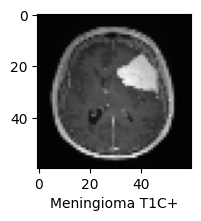

In [9]:
plot_sample(X, y, 0)

In [10]:
X.shape

(4479, 60, 60, 3)

In [13]:
from sklearn.model_selection import train_test_split

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3583, 60, 60, 3), (896, 60, 60, 3), (3583,), (896,))

In [163]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [167]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", input_shape=(60, 60, 3)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))

model.add(Dropout(0.2))
model.add(Dense(44, activation="softmax"))

In [168]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [169]:
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
112/112 [==============================] - 74s 151ms/step - loss: 3.5636 - accuracy: 0.0826 - val_loss: 3.4230 - val_accuracy: 0.1295
Epoch 2/10
112/112 [==============================] - 16s 147ms/step - loss: 3.2396 - accuracy: 0.1490 - val_loss: 2.9334 - val_accuracy: 0.2355
Epoch 3/10
112/112 [==============================] - 17s 152ms/step - loss: 2.8054 - accuracy: 0.2403 - val_loss: 2.5308 - val_accuracy: 0.3304
Epoch 4/10
112/112 [==============================] - 18s 165ms/step - loss: 2.4211 - accuracy: 0.3335 - val_loss: 2.0960 - val_accuracy: 0.4420
Epoch 5/10
112/112 [==============================] - 19s 167ms/step - loss: 2.1463 - accuracy: 0.4086 - val_loss: 1.8429 - val_accuracy: 0.4643
Epoch 6/10
112/112 [==============================] - 16s 146ms/step - loss: 1.8753 - accuracy: 0.4706 - val_loss: 1.6074 - val_accuracy: 0.5636
Epoch 7/10
112/112 [==============================] - 16s 144ms/step - loss: 1.6835 - accuracy: 0.5155 - val_loss: 1.4458 - val_ac

In [141]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 60, 60, 32)        896       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 7, 7, 64)       

In [142]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)

In [143]:
print(f"loss: {loss}")
print(f"acc: {acc}")

loss: 1.1407194137573242
acc: 0.71875


In [101]:
y_pred = model.predict(X_test)

28/28 [==============================] - 1s 36ms/step


In [102]:
y_classes = [np.argmax(element) for element in y_pred]
set(y_classes)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43}

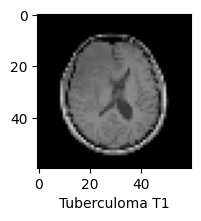

In [103]:
plot_sample(X_test, y_classes, 0)

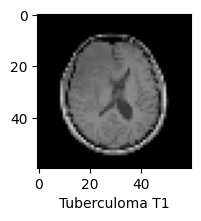

In [104]:
plot_sample(X_test, y_test, 0)

In [105]:
from sklearn.metrics import confusion_matrix, classification_report

In [106]:
print(classification_report(y_test, y_classes))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72        33
           1       0.89      0.79      0.84        42
           2       0.70      0.55      0.62        38
           3       0.83      0.67      0.74        15
           4       0.94      0.75      0.83        20
           5       0.87      0.76      0.81        17
           6       1.00      0.60      0.75        10
           7       0.55      0.67      0.60         9
           8       0.38      0.62      0.48         8
           9       0.60      1.00      0.75         3
          10       1.00      1.00      1.00         2
          11       0.25      0.25      0.25         4
          12       0.83      1.00      0.91         5
          13       0.67      0.80      0.73         5
          14       0.38      0.33      0.35         9
          15       0.67      0.86      0.75        14
          16       1.00      0.74      0.85        23
          17       0.86    

C:\Users\Rostaing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rostaing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rostaing\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


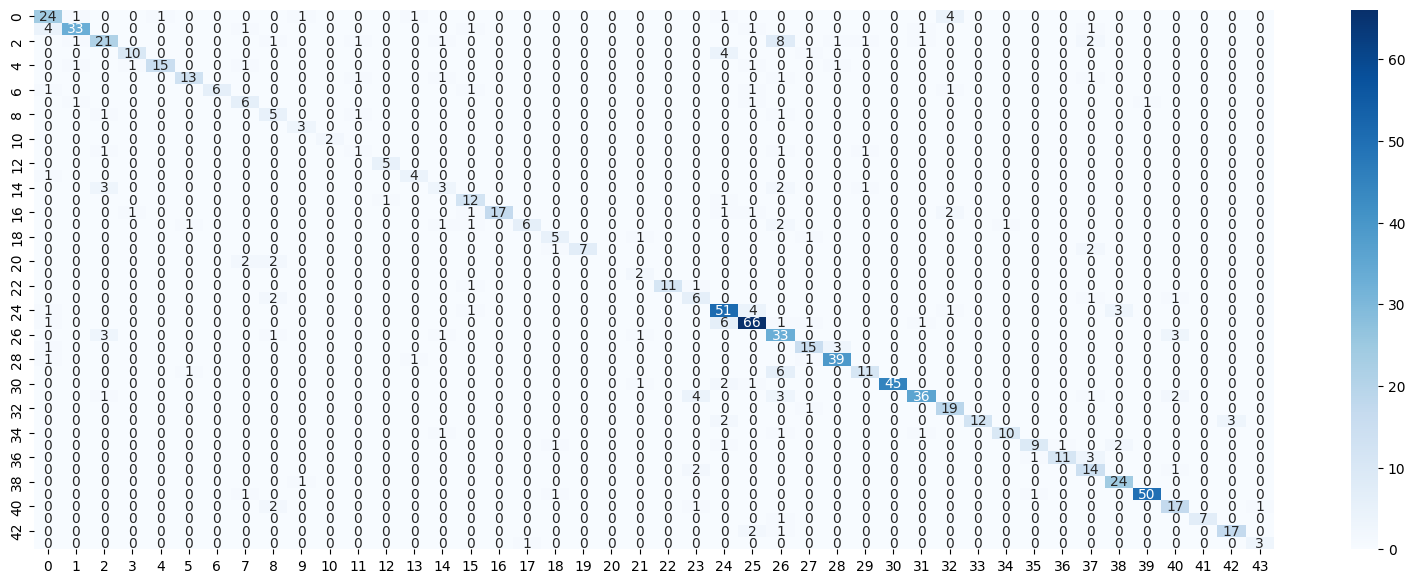

In [107]:
plt.figure(figsize=(20, 7))
cn = confusion_matrix(y_test, y_classes)
sns.heatmap(cn, annot=True, fmt='d', cmap='Blues');